# Nonlinear regression using scipy combined with using the delta-method or parametric bootstrap to estimate confidence intervals and prediction intervals

**An example showing how to use new functions called "delta_method" and "parametric_bootstrap"**

by Greg Pelletier (gjpelletier@gmail.com)

This script uses scipy to find the optimum parameters and the variance-covariance of the parameters for nonlinear regression. We also show how to use the following two new new functions to extend beyond the capabilities of scipy, to estimate confidence intervals for predicted values, and prediction intervals for new data:

- **delta_method**
- **parametric_bootstrap**

The first step is to use scipy to find the best-fit values and the variance-covariance matrix of the model parameters.

The second step is to estimate the confidence intervals and prediction intervals using new delta_metod and parametric_bootstrap functions as described in this online lecture:

https://jchiquet.github.io/MAP566/docs/regression/map566-lecture-nonlinear-regression.html#confidence-intervals-and-prediction-intervals

In this example we use a 4-parameter logistic function with a sigmoid shape to fit an observed data set. The data set that we use provided by the R base package datasets, and consist of the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA.
___

First we need to install delta_method.py from github as follows:

In [1]:
!pip install git+https://github.com/gjpelletier/delta_method.git

  Cloning https://github.com/gjpelletier/delta_method.git to /tmp/pip-req-build-46uyp947
  Running command git clone --filter=blob:none --quiet https://github.com/gjpelletier/delta_method.git /tmp/pip-req-build-46uyp947
  Resolved https://github.com/gjpelletier/delta_method.git to commit ebc5c5ed697cb9601060d6e828acefbfc1d30edc
  Preparing metadata (setup.py) ... done
  Created wheel for delta-method: filename=delta_method-1.0.31-py3-none-any.whl size=5452 sha256=d73fb7d54ee5613d0485919507cfe499f30965e7d630a90fc4e4d743a5fdda78
  Stored in directory: /tmp/pip-ephem-wheel-cache-t3dcgh09/wheels/d8/3f/0a/96f447c4e7c5299b4bd5b416181131c4903333377c307290d7
Successfully built delta-method


Next we import the new delta_method and parametric_bootstrap functions, and other python packages we need to use:

In [2]:
from delta_method import delta_method, parametric_bootstrap
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, linspace
import scipy.optimize as opt

To demonstrate an example of how to use the new functions to calculate confidence intervals and prediction intervals, we will use an example dat set provided by the R base package datasets, and consist of the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park, Wyoming, USA. In this example, x= duration of the eruption (minutes), and y= waiting time between eruptions (minutes).

In [3]:
x = np.array([3.6,1.8,3.333,2.283,4.533,2.883,4.7,3.6,1.95,4.35,1.833,3.917,
              4.2,1.75,4.7,2.167,1.75,4.8,1.6,4.25,1.8,1.75,3.45,3.067,4.533,3.6,1.967,
              4.083,3.85,4.433,4.3,4.467,3.367,4.033,3.833,2.017,1.867,4.833,1.833,4.783,
              4.35,1.883,4.567,1.75,4.533,3.317,3.833,2.1,4.633,2,4.8,4.716,1.833,4.833,
              1.733,4.883,3.717,1.667,4.567,4.317,2.233,4.5,1.75,4.8,1.817,4.4,4.167,4.7,
              2.067,4.7,4.033,1.967,4.5,4,1.983,5.067,2.017,4.567,3.883,3.6,4.133,4.333,
              4.1,2.633,4.067,4.933,3.95,4.517,2.167,4,2.2,4.333,1.867,4.817,1.833,4.3,
              4.667,3.75,1.867,4.9,2.483,4.367,2.1,4.5,4.05,1.867,4.7,1.783,4.85,3.683,
              4.733,2.3,4.9,4.417,1.7,4.633,2.317,4.6,1.817,4.417,2.617,4.067,4.25,1.967,
              4.6,3.767,1.917,4.5,2.267,4.65,1.867,4.167,2.8,4.333,1.833,4.383,1.883,4.933,
              2.033,3.733,4.233,2.233,4.533,4.817,4.333,1.983,4.633,2.017,5.1,1.8,5.033,
              4,2.4,4.6,3.567,4,4.5,4.083,1.8,3.967,2.2,4.15,2,3.833,3.5,4.583,2.367,5,
              1.933,4.617,1.917,2.083,4.583,3.333,4.167,4.333,4.5,2.417,4,4.167,1.883,
              4.583,4.25,3.767,2.033,4.433,4.083,1.833,4.417,2.183,4.8,1.833,4.8,4.1,
              3.966,4.233,3.5,4.366,2.25,4.667,2.1,4.35,4.133,1.867,4.6,1.783,4.367,
              3.85,1.933,4.5,2.383,4.7,1.867,3.833,3.417,4.233,2.4,4.8,2,4.15,1.867,
              4.267,1.75,4.483,4,4.117,4.083,4.267,3.917,4.55,4.083,2.417,4.183,2.217,
              4.45,1.883,1.85,4.283,3.95,2.333,4.15,2.35,4.933,2.9,4.583,3.833,2.083,
              4.367,2.133,4.35,2.2,4.45,3.567,4.5,4.15,3.817,3.917,4.45,2,4.283,4.767,
              4.533,1.85,4.25,1.983,2.25,4.75,4.117,2.15,4.417,1.817,4.467])
y = np.array([79,54,74,62,85,55,88,85,51,85,54,84,78,47,83,52,62,84,52,79,51,47,78,69,
              74,83,55,76,78,79,73,77,66,80,74,52,48,80,59,90,80,58,84,58,73,83,64,53,
              82,59,75,90,54,80,54,83,71,64,77,81,59,84,48,82,60,92,78,78,65,73,82,56,
              79,71,62,76,60,78,76,83,75,82,70,65,73,88,76,80,48,86,60,90,50,78,63,72,
              84,75,51,82,62,88,49,83,81,47,84,52,86,81,75,59,89,79,59,81,50,85,59,87,
              53,69,77,56,88,81,45,82,55,90,45,83,56,89,46,82,51,86,53,79,81,60,82,77,
              76,59,80,49,96,53,77,77,65,81,71,70,81,93,53,89,45,86,58,78,66,76,63,88,
              52,93,49,57,77,68,81,81,73,50,85,74,55,77,83,83,51,78,84,46,83,55,81,57,
              76,84,77,81,87,77,51,78,60,82,91,53,78,46,77,84,49,83,71,80,49,75,64,76,
              53,94,55,76,50,82,54,75,78,79,78,78,70,79,70,54,86,50,90,54,54,77,79,64,
              75,47,86,63,85,82,57,82,67,74,54,83,73,73,88,80,71,83,56,79,78,84,58,83,
              43,60,75,81,46,90,46,74])

_____
**Using scipy to find the optimum parameters and the variance-covarance matrix of the parameters, combined with using the new delta_method function to find the confidence intervals and prediction intervals**

First we will need to define function we will call "f" that describes the equation for the non-linear regression. This function will be used by scipy's opt.curve_fit. scipy requires that the parameters in input argument to f need to be separated from each other, and they all need to follow the x argument. The parameters names can be anything you want.

In this example, we use a sigmoid-shaped logistic function. In other applicaitons, the user will need to customize these functions to match the equation depending on the application.

In [4]:
def f(x, A, gamma, tau, S):
     return (A-S) / ( 1 + exp(-gamma * (x - tau)) ) + S

Next we will make a numpy array we will call "p_init" of the initial parameter values to use with f. Note that the guesses need to be approximately the same order of magnitude as the optimum values


In [5]:
A_init = 90
gamma_init = 2
tau_init = 2
S_init = 50
p_init = np.array([A_init, gamma_init, tau_init, S_init])

Now we are ready to find the optimum best fit paramter array (popt) and variance-covariance matrix (pcov) from scipy. Note that we could also specify min and max bounds for each parameter with the bounds option

In [6]:
popt, pcov = opt.curve_fit(f, x, y, p0=p_init, bounds=(-np.inf,np.inf))

print('popt=','\n',popt)
print('pcov=','\n',pcov)

popt= 
 [82.46604651  2.25386129  3.05525935 51.32184518]
pcov= 
 [[ 9.95441275e-01 -3.34801157e-01  2.19382371e-03 -9.83117297e-01]
 [-3.34801157e-01  1.89607167e-01  2.26480737e-02  6.88499878e-01]
 [ 2.19382371e-03  2.26480737e-02  1.22510108e-02  1.47504773e-01]
 [-9.83117297e-01  6.88499878e-01  1.47504773e-01  3.35350983e+00]]


Now that we have found popt and pcov, we are ready to use the delta_method function to find the confidence intervals and prediction intervals for the regression.

Before using delta_method, we first need to define "x_new", which is an array of equally spaced x-values that we will use to evaluate smooth curves showing the confidence intervals. In this example we use linspace to create a vector that starts a litte lower than min(x) and ends a little above max(x)

We alse need to define the alpha level for the confidence intervals and prediction intervals

In [7]:
x_new = linspace(1, 6, 100)
alpha=0.05

Now we are ready to use the delta_method function to find the prediction interval and confidence intervals as follows, and save the results in a dictionary that we will call "d":

In [8]:
d = delta_method(pcov,popt,x_new,f,x,y,alpha)

Now we can extract the confidence intervals, prediction intervals, and other regression statistics to show on an output plot

In [9]:
# extract the output values from the delta-method output dictionary
y_new = d['y_new']
lwr_conf = d['lwr_conf']
upr_conf = d['upr_conf']
lwr_pred = d['lwr_pred']
upr_pred = d['upr_pred']
rsquared = d['rsquared']
pvalue = d['pvalue']
syx = d['syx']

# make string values of fit stats and eqn for the plot labels
pstr = '%.2e' %pvalue
rsqstr = '%.4f' %rsquared
b1str = '%.1f' %popt[0]
b2str = '%.2f' %popt[1]
b3str = '%.2f' %popt[2]
b4str = '%.1f' %popt[3]
syxstr = '%.4f' %syx
eqnstr = 'y = (' + b1str + '-' + b4str + ')/(1+exp(-' + b2str + '*(x-' + b3str + '))+' + b4str

print('The best-fit nonlinear regression equation is as follows:')
print(eqnstr)
print('r^2 = '+ rsqstr +', p = '+ pstr)
print('std err of the regression = '+ syxstr)

The best-fit nonlinear regression equation is as follows:
y = (82.5-51.3)/(1+exp(-2.25*(x-3.06))+51.3
r^2 = 0.8309, p = 1.11e-16
std err of the regression = 5.6216


Now we can plot the results showing the confidence intervals and prediction intervals

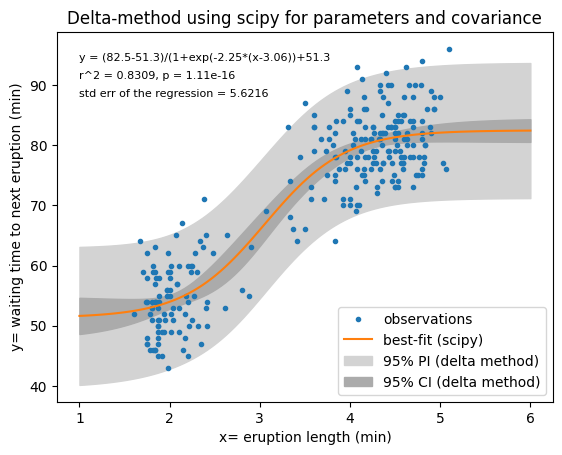

In [10]:
# plot the results
plt.figure()
plt.plot(x, y, '.', label='observations')
# plt.plot(x_new, y_new, '--k', label='best-fit (lmfit)',linewidth=4)    # lmfit solution of best fit
plt.plot(x_new, y_new, '-', label='best-fit (scipy)')     # scipy solution of best fit
# 95% prediction limits
plt.fill_between(x_new, d['lwr_pred'], d['upr_pred'],color="#d3d3d3", label=str(int(100*(1-alpha)))+'% PI (delta method)')
# 95% confidence limits
plt.fill_between(x_new, d['lwr_conf'], d['upr_conf'],color="#ABABAB", label=str(int(100*(1-alpha)))+'% CI (delta method)')
plt.legend(loc='lower right')
plt.title('Delta-method using scipy for parameters and covariance')
plt.xlabel('x= eruption length (min)')
plt.ylabel('y= waiting time to next eruption (min)')
plt.text(1.0, 94, eqnstr, fontsize = 8)
plt.text(1.0, 91, 'r^2 = '+ rsqstr +', p = '+ pstr, fontsize = 8)
plt.text(1.0, 88, 'std err of the regression = '+ syxstr, fontsize = 8)
plt.ticklabel_format(style='plain', axis='y');
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));

We can also print out more regression statistics from the delta_method output dictionary as follows:

In [11]:
# extract the output values we need for the regression stats
pvalue = d['pvalue']
rsquared = d['rsquared']
adj_rsquared = d['adj_rsquared']
qt = d['qt']
MSE = d['MSE']
syx = d['syx']
df = d['df']

# print the regression stats
print('p-value of the regression F test = ' + '%.2e' %pvalue)
print('rsquared = ' + '%.4f' %rsquared)
print('adjusted rsquared = ' + '%.4f' %adj_rsquared)
print('2-tailed t-statistic at alpha ' + '%.2f' %alpha + ' used for confidence/prediction intervals = ' + '%.3f' %qt)
print('Mean Square Error (MSE) of the residuals = ' + '%.3e' %MSE)
print('standard error of the regression = ' + '%.3e' %syx)
print('degrees of freedom (number of observations - number of parameters) = ' + '%.0f' %df)

p-value of the regression F test = 1.11e-16
rsquared = 0.8309
adjusted rsquared = 0.8284
2-tailed t-statistic at alpha 0.05 used for confidence/prediction intervals = 1.969
Mean Square Error (MSE) of the residuals = 3.160e+01
standard error of the regression = 5.622e+00
degrees of freedom (number of observations - number of parameters) = 268


_____
**Parametric bootstrap instead of the delta-method**

Parametric bootstrapping with the parametric_bootstrap function is an alternative to the delta_method. Next we will apply parametric_bootstrap to estimate the confidence intervals and prediction intervals of the nonlinear regression.

Here is an example of how to use the new parametric_bootstrap function to calculate the confidence intervals and prediction intervals (we will use the same popt, x_new, f, x, y, and alpha that were defined above):

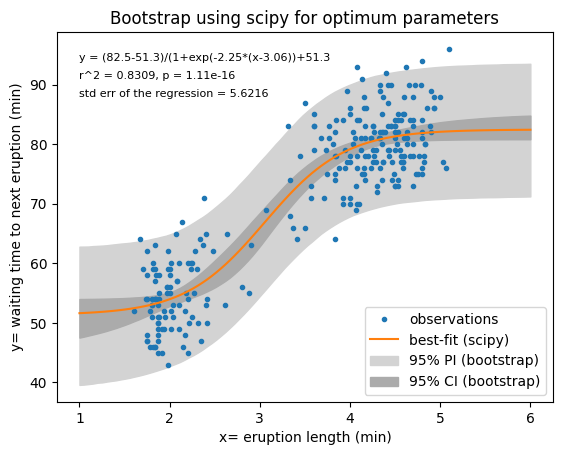

In [12]:
# first we need to specify the number of trials for bootstrap Monte Carlo
trials = 10000

# next we use parametric_boostrap to get an output dictionary we will call "b"
b = parametric_bootstrap(popt,x_new,f,x,y,alpha,trials)

# extract the output values for the confidence intervals and prediction intervals from the output dictionary
y_new = b['y_new']
mc_lwr_conf = b['lwr_conf']
mc_upr_conf = b['upr_conf']
mc_lwr_pred = b['lwr_pred']
mc_upr_pred = b['upr_pred']
rsquared = b['rsquared']
pvalue = b['pvalue']
syx = b['syx']

# plot the results
plt.figure()
plt.plot(x, y, '.', label='observations')
# plt.plot(x_new, y_new, '--k', label='best-fit (lmfit)',linewidth=4)    # lmfit solution of best fit
plt.plot(x_new, y_new, '-', label='best-fit (scipy)')     # scipy solution of best fit
# 95% prediction limits
plt.fill_between(x_new, mc_lwr_pred, mc_upr_pred,color="#d3d3d3", label=str(int(100*(1-alpha)))+'% PI (bootstrap)')
# 95% confidence limits
plt.fill_between(x_new, mc_lwr_conf, mc_upr_conf,color="#ABABAB", label=str(int(100*(1-alpha)))+'% CI (bootstrap)')
plt.legend(loc='lower right')
plt.title('Bootstrap using scipy for optimum parameters')
plt.xlabel('x= eruption length (min)')
plt.ylabel('y= waiting time to next eruption (min)')
plt.text(1.0, 94, eqnstr, fontsize = 8)
plt.text(1.0, 91, 'r^2 = '+ rsqstr +', p = '+ pstr, fontsize = 8)
plt.text(1.0, 88, 'std err of the regression = '+ syxstr, fontsize = 8)
plt.ticklabel_format(style='plain', axis='y');
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0));

_____
**Confidence intervals for model parameters**

Next we will show two methods to estimate the confidence intervals for model parameters, as described in https://jchiquet.github.io/MAP566/docs/regression/map566-lecture-nonlinear-regression.html#confidence-intervals-for-the-model-parameters

Method 1. Parametric bootstrap using outputs from the new parametric_boostrap function

In [13]:
print("Confidence intervals of parameters using parametric bootstrap")
print("")
print("Parameter\t beta_hat \t " + str(int(100*(1-alpha))) + "% confidence intervals")
print("A:       \t %.4f     \t (%.4f - %.4f)" % (popt[0], b['popt_lwr_conf'][0], b['popt_upr_conf'][0]))
print("gamma:   \t %.4f     \t (%.4f - %.4f)" % (popt[1], b['popt_lwr_conf'][1], b['popt_upr_conf'][1]))
print("tau:     \t %.4f     \t (%.4f - %.4f)" % (popt[2], b['popt_lwr_conf'][2], b['popt_upr_conf'][2]))
print("S:       \t %.4f     \t (%.4f - %.4f)" % (popt[3], b['popt_lwr_conf'][3], b['popt_upr_conf'][3]))

Confidence intervals of parameters using parametric bootstrap

Parameter	 beta_hat 	 95% confidence intervals
A:       	 82.4660     	 (80.8342 - 85.1516)
gamma:   	 2.2539     	 (1.4897 - 3.3921)
tau:     	 3.0553     	 (2.7864 - 3.2508)
S:       	 51.3218     	 (45.3837 - 53.9586)


Method 2. Linearization approach using outputs of popt and pcov from scipy's opt.curve_fit

In [14]:
import scipy.stats as stats

# optimum values of each parameter from scipy
beta_hat = popt

# standard errors of each parameter are the sqrt of the diagonal of the variance-covariance matrix
se_lin = np.sqrt(np.diag(pcov))

# t-statistic and 2-sided probability Pr(>|t|)
t_stat = beta_hat/se_lin                  # t statistic
df = d["df"]                              # degrees of freedom
pval = stats.t.sf(np.abs(t_stat), df)*2   # two-sided p-value = Prob(abs(t)>tt)
qt = d["qt"]                              # t(1-alpha/2,df)

# 2-tailed confidence interals at alpha (we are using alpha=0.05 for 95% confidence intervals)
lwr_ci = popt - qt * se_lin        # lower confidence interval
upr_ci = popt + qt * se_lin        # upper confidence interval

# print out a summary
print("Confidence intervals of parameters using the linearization approach")
print("")
print("Parameter \t beta_hat \t se_lin \t Pr(>|t|) \t " + str(int(100*(1-alpha))) + "% confidence intervals")
print("A:        \t %.4f     \t %.4f   \t %.1e     \t (%.4f - %.4f)" % (popt[0], se_lin[0], pval[0], lwr_ci[0], upr_ci[0]))
print("gamma:    \t %.4f     \t %.4f   \t %.1e     \t (%.4f - %.4f)" % (popt[1], se_lin[1], pval[1], lwr_ci[1], upr_ci[1]))
print("tau:      \t %.4f     \t %.4f   \t %.1e     \t (%.4f - %.4f)" % (popt[2], se_lin[2], pval[2], lwr_ci[2], upr_ci[2]))
print("S:        \t %.4f     \t %.4f   \t %.1e     \t (%.4f - %.4f)" % (popt[3], se_lin[3], pval[3], lwr_ci[3], upr_ci[3]))

Confidence intervals of parameters using the linearization approach

Parameter 	 beta_hat 	 se_lin 	 Pr(>|t|) 	 95% confidence intervals
A:        	 82.4660     	 0.9977   	 1.0e-192     	 (80.5017 - 84.4304)
gamma:    	 2.2539     	 0.4354   	 4.5e-07     	 (1.3965 - 3.1112)
tau:      	 3.0553     	 0.1107   	 2.5e-80     	 (2.8373 - 3.2732)
S:        	 51.3218     	 1.8313   	 1.2e-81     	 (47.7164 - 54.9273)
